# Exercise 3 [Linear Quadratic Regulators]

Here we discuss the problem of computing the optimal control policy for problems of the form
$$ \min_{\mathbf{u}_n} \mathbf{x}_N^T \mathbf{Q}_N \mathbf{x}_N \sum_{n=0}^{N-1} \mathbf{x}_{n}^T \mathbf{Q}_n \mathbf{x}_n + \mathbf{u}_n^T \mathbf{R}_n \mathbf{u}_n\\
s.t. \ \mathbf{x}_{n+1} = \mathbf{A}_n \mathbf{x}_n + \mathbf{B}_n \mathbf{u}_n + \omega_n$$
where $\mathbf{R}>0$, $\mathbf{Q} \geq 0$ and $\mathbb{E}(\omega_n) = 0$ and $\mathbb{E}(\omega_n^T \omega_n) \leq \infty$ (i.e. the noise has 0 mean and finite variance)

We have seen in the class that the optimal control and optimal value function (and cost-to-go for every stage) could be found by solving the following backward Riccati equations from $N$ to $0$
$$\mathbf{P}_N = \mathbf{Q}_N\\
\mathbf{K}_n = -(\mathbf{R}_n+\mathbf{B}_n^T \mathbf{P}_{n+1} \mathbf{B}_n)^{-1} (\mathbf{B}_n^T \mathbf{P}_{n+1} A_n)\\
\mathbf{P}_n = \mathbf{Q}_n + \mathbf{A}_n^T \mathbf{P}_{n+1} \mathbf{A}_n + \mathbf{A}_n^T \mathbf{P}_{n+1} \mathbf{B}_n \mathbf{K}_n$$

The optimal policy is then $$\mu_n^* = \mathbf{K}_n \mathbf{x}_n$$
and the optimal value function is $$J_0(\mathbf{x}_0) = \mathbf{x}_0^T \mathbf{P}_0 \mathbf{x}_0 + \sum_{n=0}^{N-1} \mathbb{E}(\omega_n^T P_{n+1} \omega_n)$$

## Question 1
Write a function that solves the backward Riccati equations assuming that $A_n$, $B_n$, $Q_n$ and $R_n$ are constant matrices by completing the matrix below

In [47]:
def solve_ricatti_equations(A,B,Q,R,horizon_length):
    """
    This function solves the backward Riccatti equations for regulator problems of the form
    min xQx + sum(xQx + uRu) subject to xn+1 = Axn + Bun
    
    Arguments:
    A, B, Q, R: numpy arrays defining the problem
    horizon_length: length of the horizon
    
    Returns:
    P: list of numpy arrays containing Pn from N to 0
    K: list of numpy arrays containing Kn from N-1 to 0
    """
    P = [] #will contain the list of Ps from N to 0
    K = [] #will contain the list of Ks from N-1 to 0
    
    
    #################################################
    #### THIS IS WERE YOU NEED TO FILL YOUR CODE ####
    #################################################
    n=horizon_length
    current_p=Q
    P.append(current_p)
    while n>0:
        current_K = -1*np.linalg.inv(R+np.dot(B.T, current_p).dot(B)).dot(np.dot(B.T,current_p).dot(A))
        K.append(current_K)
        current_p = Q+np.dot(A.T,current_p).dot(A)+np.dot(np.dot(np.dot(A.T,current_p),B),current_K)
        P.append(current_p)
        n=n-1
    
    return P[::-1],K[::-1]

## Question 2

1. Compute the optimal controllers for the four systems shown in Exercise 2 [Controllability] for an horizon length of 100 steps using $Q = I_{3 \times 3}$ and $R = 0.1$.
2. Compute the behavior of each system for initial conditions $x_0 = [1,1,1]$ when using the optimal controller and compare the system behavior when no controller is used ($u_n = 0$). 
3. For which system did the controller lead to a stable system?

In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def calculate_system_no_controller(A,B,x0,K):
    """
    This function calculates the state xn for each step with 0 control
    xn+1 = Axn 
    un=Kn*xn
    Arguments:
    A, B, x0, K 
    
    Returns:
    X: list of numpy arrays containing states xn from 0 to N
    time: list of numpy arrays containing time step from 0 to N
    """
    X=np.zeros([x0.size,horizon_length])
    xn=x0
    time=[]
    for i in range(horizon_length):
        X[:, i] = xn
        xn=A.dot(xn)#+ B.dot(K[i].dot(xn))#######+ K[i].dot(B)
        time.append(i)
    return X, time
def calculate_system(A,B,x0,K):
    """
    This function calculates the state xn for each step
    xn+1 = Axn + Bun
    un=Kn*xn
    Arguments:
    A, B, x0, K 
    
    Returns:
    X: list of numpy arrays containing states xn from 0 to N
    time: list of numpy arrays containing time step from 0 to N
    """
    X=np.zeros([x0.size,horizon_length])
    u=[]
    xn=x0
    time=[]
    for i in range(horizon_length):
        X[:, i] = xn
        u.append(K[i].dot(xn))
        xn=A.dot(xn)+ B.dot(K[i].dot(xn))
        time.append(i)
    return X, u,time

def check_controllability(A,B):
    """
    This function check  the controllabilitystate for system
    c=[B AB A^2B]
    """
    c=np.concatenate([B, np.dot(A, B), np.dot(A, A).dot(B)], axis=1)
    R=np.linalg.matrix_rank(c)
    print('rank is',R)
    if R< np.linalg.matrix_rank(A):
        print('is not controllable')
    else:print('is controllable')

rank is 2
is not controllable


Text(0.5,0,'Time')

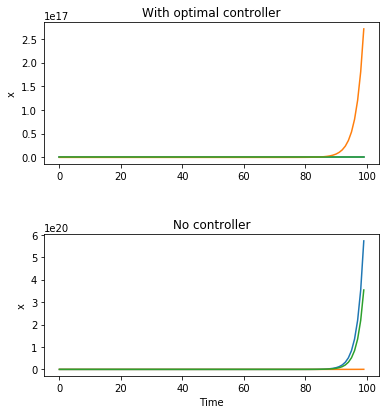

In [49]:
#system a
Q=np.eye(3)
R=0.1*np.eye(1)
A1=np.array([[1.,0.,1.],[0.,1.5,0.],[1.,0.,0.]])
B1=np.array([[0.],[0.],[1.]])
check_controllability(A1,B1)
horizon_length=100
x0=np.array([1.,1.,1.])
P1,K1=solve_ricatti_equations(A1, B1, Q, R, horizon_length)
X, u,time=calculate_system(A1,B1,x0,K1)
X_no_contrl,time=calculate_system_no_controller(A1,B1,x0,K1)
plt.figure(figsize=(6, 6.5))
plt.subplots_adjust(wspace =0, hspace =0.5)

plt.subplot(2,1,1)
plt.plot(time,X[0,:])
plt.plot(time,X[1,:])
plt.plot(time,X[2,:])
plt.title('With optimal controller')
plt.ylabel('x')
plt.subplot(2,1,2)
plt.plot(time,X_no_contrl[0,:])
plt.plot(time,X_no_contrl[1,:])
plt.plot(time,X_no_contrl[2,:])
plt.title('No controller')
plt.ylabel('x')
plt.xlabel('Time')

rank is 3
is controllable


Text(0.5,0,'Time')

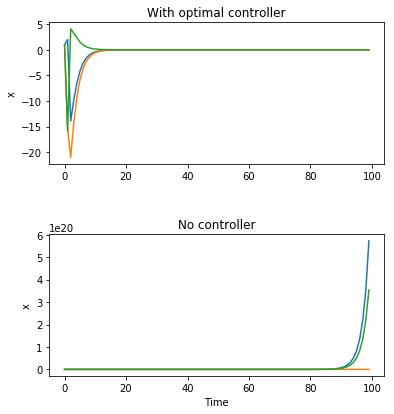

In [50]:
#system b

A2=np.array([[1.,0.,1.],[0.,1.5,0.],[1.,0.,0.]])
B2=np.array([[0.],[1.],[1.]])
check_controllability(A2,B2)
horizon_length=100
P2,K2=solve_ricatti_equations(A2, B2, Q, R, horizon_length)
X, u,time=calculate_system(A2,B2,x0,K2)
X_no_contrl,time=calculate_system_no_controller(A2,B2,x0,K2) 
plt.figure(figsize=(6, 6.5))
plt.subplots_adjust(wspace =0, hspace =0.5)
plt.subplot(2,1,1)
plt.plot(time,X[0,:])
plt.plot(time,X[1,:])
plt.plot(time,X[2,:])
plt.ylabel('x')
plt.title('With optimal controller')
plt.subplot(2,1,2)
plt.plot(time,X_no_contrl[0,:])
plt.plot(time,X_no_contrl[1,:])
plt.plot(time,X_no_contrl[2,:])
plt.ylabel('x')
plt.title('No controller')
plt.xlabel('Time')

rank is 3
is controllable


Text(0.5,0,'Time')

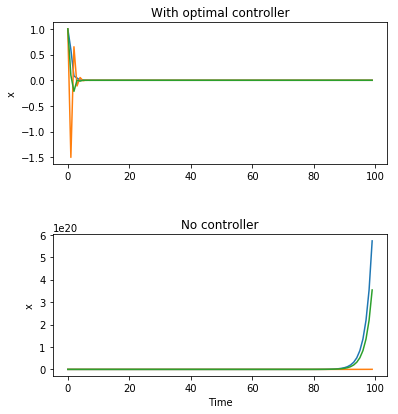

In [51]:
#system c

A3=np.array([[0.5,0.,0.5],[0.,-0.5,-1.],[0.,0.,0.5]])
B3=np.array([[1.],[0.],[1.]])
check_controllability(A3,B3)
horizon_length=100
P3,K3=solve_ricatti_equations(A3, B3, Q, R, horizon_length)
X, u,time=calculate_system(A3,B3,x0,K3)
X_no,time=calculate_system_no_controller(A3,B3,x0,K3)
plt.figure(figsize=(6, 6.5))
plt.subplots_adjust(wspace =0, hspace =0.5)
plt.subplot(2,1,1)
plt.plot(time,X[0,:])
plt.plot(time,X[1,:])
plt.plot(time,X[2,:])
plt.ylabel('x')
plt.title('With optimal controller')
plt.subplot(2,1,2)
plt.plot(time,X_no_contrl[0,:])
plt.plot(time,X_no_contrl[1,:])
plt.plot(time,X_no_contrl[2,:])
plt.ylabel('x')
plt.title('No controller')
plt.xlabel('Time')

rank is 3
is controllable


Text(0.5,0,'Time')

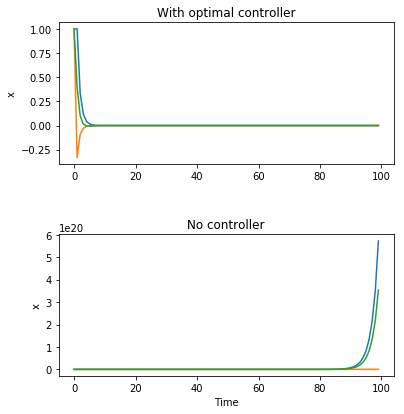

In [52]:
#system d

A4=np.array([[0.5,0.5,0.],[0.,-0.5,-1.],[-0.1,0.,0.5]])
B4=np.array([[0.],[1.],[0.]])
check_controllability(A4,B4)
horizon_length=100
P4,K4=solve_ricatti_equations(A4, B4, Q, R, horizon_length)
X, u,time=calculate_system(A4,B4,x0,K4)
X_no,time=calculate_system_no_controller(A4,B4,x0,K4)
plt.figure(figsize=(6, 6.5))
plt.subplots_adjust(wspace =0, hspace =0.5)
plt.subplot(2,1,1)
plt.plot(time,X[0,:])
plt.plot(time,X[1,:])
plt.plot(time,X[2,:])
plt.ylabel('x')
plt.title('With optimal controller')
plt.subplot(2,1,2)
plt.plot(time,X_no_contrl[0,:])
plt.plot(time,X_no_contrl[1,:])
plt.plot(time,X_no_contrl[2,:])
plt.ylabel('x')
plt.title('No controller')
plt.xlabel('Time')